The dataset was randomly split into training (70%), validation (15%), and test (15%) images.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
dataset_path = "/task2/splitdataset"

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

IMG_SIZE = (64, 64)

def load_images_and_labels_batch(data_dir, batch_size=32):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))  # всі класи
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        class_images = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype("float32") / 255.0  # нормалізація
            class_images.append(img)

            if len(class_images) >= batch_size:
                images.extend(class_images)
                labels.extend([class_to_idx[class_name]] * len(class_images))
                class_images = []
        if class_images:
            images.extend(class_images)
            labels.extend([class_to_idx[class_name]] * len(class_images))

    return np.array(images), np.array(labels), class_to_idx

X_train, y_train, class_indices = load_images_and_labels_batch(train_dir)
X_val, y_val, _ = load_images_and_labels_batch(val_dir)
X_test, y_test, _ = load_images_and_labels_batch(test_dir)

y_train = to_categorical(y_train, num_classes=len(class_indices))
y_val = to_categorical(y_val, num_classes=len(class_indices))
y_test = to_categorical(y_test, num_classes=len(class_indices))

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(class_indices)


Форма X_train: (18322, 64, 64, 3), Форма y_train: (18322, 10)
Класи: {'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [39]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding = 'same'),
    layers.Dropout(0.5),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(len(class_indices), activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0007),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,452,714 (5.54 MB)

 Trainable params: 1,452,074 (5.54 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.2285 - loss: 2.6576 - val_accuracy: 0.1839 - val_loss: 6.0032
Epoch 2/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.4164 - loss: 1.7371 - val_accuracy: 0.3902 - val_loss: 1.8824
Epoch 3/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4793 - loss: 1.5193 - val_accuracy: 0.3719 - val_loss: 2.0445
Epoch 4/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5208 - loss: 1.4123 - val_accuracy: 0.4330 - val_loss: 1.7555
Epoch 5/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5506 - loss: 1.3243 - val_accuracy: 0.4829 - val_loss: 2.0684
Epoch 6/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5563 - loss: 1.2906 - val_accuracy: 0.5787 - val_loss: 1.2346
Epoch 7/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5884 - loss: 1.1971 - val_accuracy: 0.5611 - val_loss: 1.2741
Epoch 8/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6038 - loss: 1.1622 - 

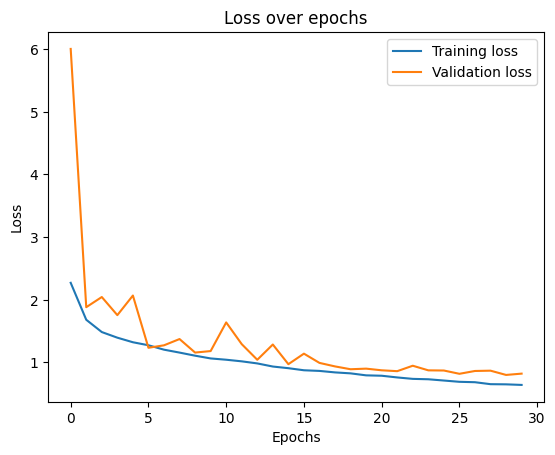

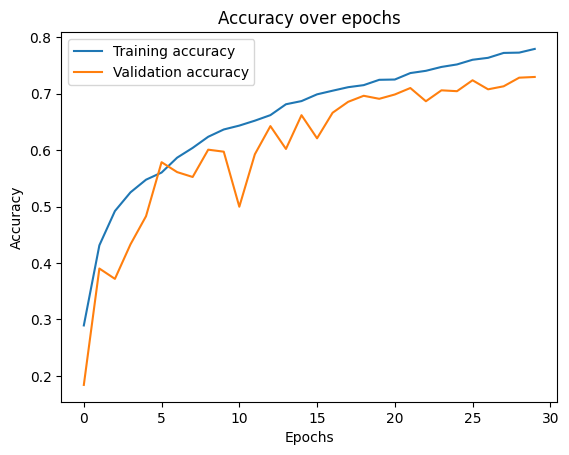

In [41]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val)
)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print(f"Accuracy: {test_acc * 100:.2f}%")

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6901 - loss: 0.9628
Accuracy: 72.76%


In [45]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


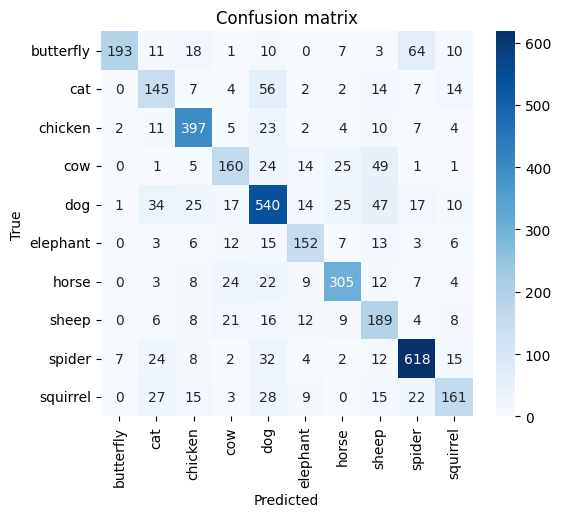

In [48]:
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()


In [ ]:
model.save("model.keras")

To improve accuracy, the image size could be reduced less, oversampling could be applied, or the weights could be adjusted.